In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [4]:
from numpy.random import multinomial

def sample_series(series, n=1000):
    return multinomial(series.sum(), series/series.sum(), n)

In [7]:
import numpy as np

from lint_analysis.bin_counts.models import BinCount

def plot_sampled_series(token, w=7, h=7):
    
    series = BinCount.token_series(token)
    
    expected = series.sum() / len(series)
    samples = sample_series(np.full(len(series), expected))
    
    avg_std = samples.std(1).mean()

    plt.figure(figsize=(w,h))
    
    plt.plot([0, 100], [expected, expected], c='orange', lw=0.5)

    plt.fill_between(
        range(101),
        expected + 2*avg_std,
        expected - 2*avg_std,
        color='black',
        alpha=0.1,
    )
    
    print(token)
    
    plt.title(token)
    plt.plot(series)
    plt.show()

sunday


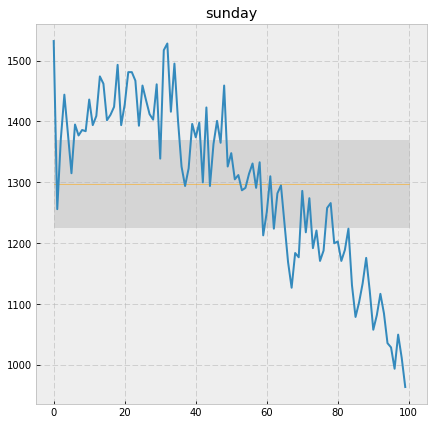

saturday


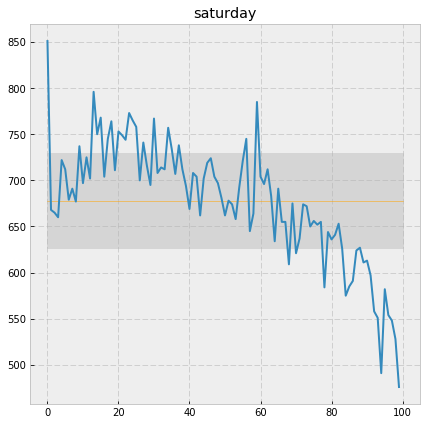

friday


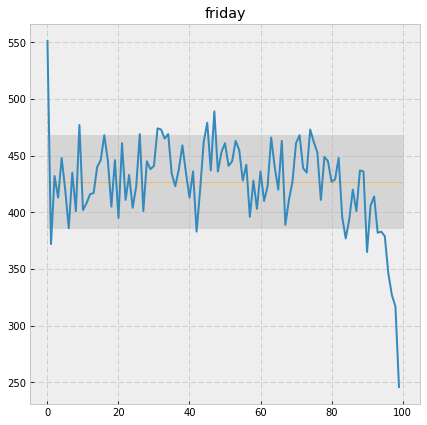

thursday


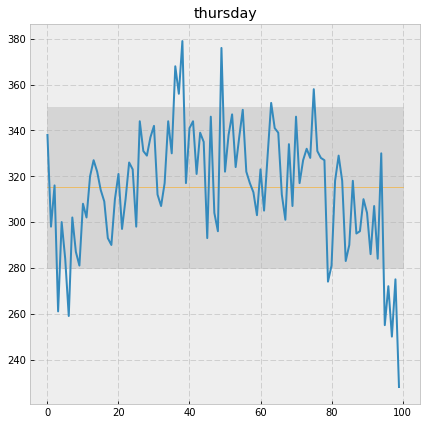

wednesday


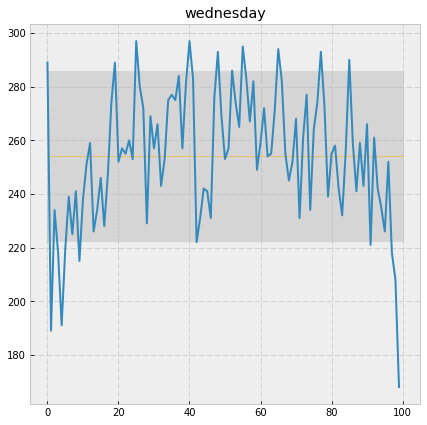

tuesday


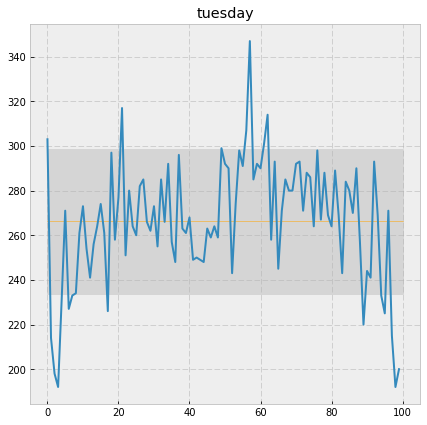

monday


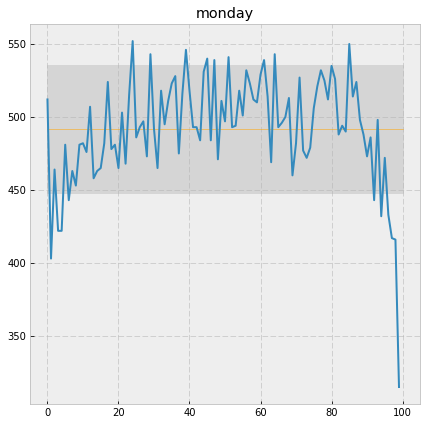

In [8]:
plot_sampled_series('sunday')
plot_sampled_series('saturday')
plot_sampled_series('friday')
plot_sampled_series('thursday')
plot_sampled_series('wednesday')
plot_sampled_series('tuesday')
plot_sampled_series('monday')

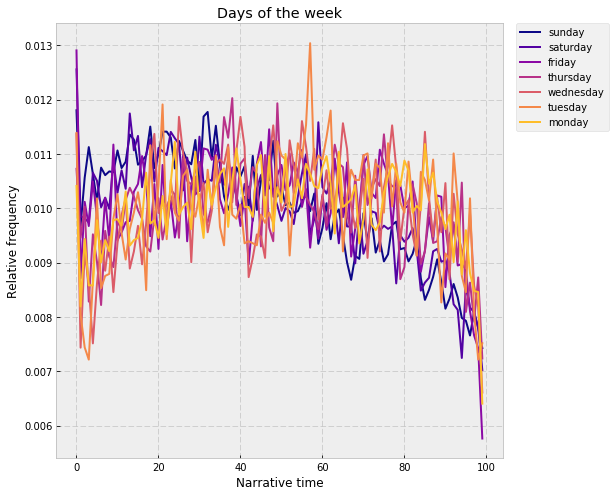

In [30]:
days = [
    'sunday',
    'saturday',
    'friday',
    'thursday',
    'wednesday',
    'tuesday',
    'monday',
]

cm = plt.get_cmap('plasma')

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_color_cycle([
    cm(i/len(days))
    for i in range(len(days))
])

lines = []
for day in days:
    series = BinCount.token_series(day)
    series /= series.sum()
    line, = ax.plot(series, label=day)
    lines.append(line)
    
plt.legend(
    handles=lines,
    bbox_to_anchor=(1.03, 1),
    loc=2,
    borderaxespad=0,
)

plt.title('Days of the week')
plt.xlabel('Narrative time')
plt.ylabel('Relative frequency')
plt.show()